##RECOMMENDATION SYSTEM :
A recommendation system, also known as a recommender or recommendation engine, is a type of software application or algorithm designed to provide personalized suggestions or recommendations to users. These suggestions are often related to products, services, content, or items of interest, with the goal of enhancing user experience and engagement.

##Types of recommendation systems :
1. Collaborative Filtering:
   * `User-Based Collaborative Filtering: `This approach recommends items based on the preferences and behavior of users with similar tastes. If user A and user B have similar preferences, items liked by user B but not yet seen by user A may be recommended to A.
   *` Item-Based Collaborative Filtering: `This approach recommends items similar to those previously liked or interacted with by the user. It identifies items that are similar to the ones the user has shown interest in.

2. Content-Based Filtering:

  * This approach recommends items based on their features and characteristics. For example, in a movie recommendation system, movies may be recommended based on their genres, cast, director, or other relevant features. The system suggests items that are similar in content to those the user has previously liked.

3. Hybrid Models:

 * Hybrid recommendation systems combine multiple approaches, such as collaborative filtering and content-based filtering, to leverage the strengths of each and improve overall recommendation accuracy.

## DATASET:

We have two datasets here:
1. Movies:
   * MovieId - unique number for each movie
   * title   - Name of the movie
   * genres  - which category each movie belongs to

2. Ratings:
  * UserID   - Unique number for each user
  * movieId  - unique number for each movie
  * rating   - ratings given by user to each movie
  * timestamp - time when the rating is given

In [4]:
#libraries
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

#text preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

#similarity check
from sklearn.metrics.pairwise import linear_kernel

#collaborative filtering
!pip install scikit-surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate


In [5]:
#loading the data
movie_df = pd.read_csv('/content/movies.csv', delimiter=',')
rating_df = pd.read_csv('/content/ratings.csv', delimiter=',')

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


It is observed that for some movies contains more than one genre

In [9]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
print("Number of unique movie id in movies dataset = ", movie_df['movieId'].nunique())
print('!'*40)
print("Number of unique movie id in rating dataset = ", rating_df['movieId'].nunique())
print('!'*40)
print("Movies which have no raings = ",movie_df['movieId'].nunique()-rating_df['movieId'].nunique())
print('!'*40)
missing_movie_ids = set(movie_df['movieId']).difference(rating_df['movieId'])
movie_df[movie_df['movieId'].isin(missing_movie_ids)]


Number of unique movie id in movies dataset =  9742
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Number of unique movie id in rating dataset =  9724
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Movies which have no raings =  18
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


Observation: 18 movies have no ratings in the dataset.

In [11]:
# Merge DataFrames based on the 'movieID' column
df = pd.merge(movie_df, rating_df, on='movieId', how='left')

In [12]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


# EDA

In [13]:
dict={}
#iterating the columns
for i in df.columns:
    dict[i]=df[i].value_counts().shape[0]   #calculating the unique values

pd.DataFrame(dict,index=['Unique_vals']).T.style.background_gradient(cmap='YlGn')

,Unique_vals
movieId,9742
title,9737
genres,951
userId,610
rating,10
timestamp,85043


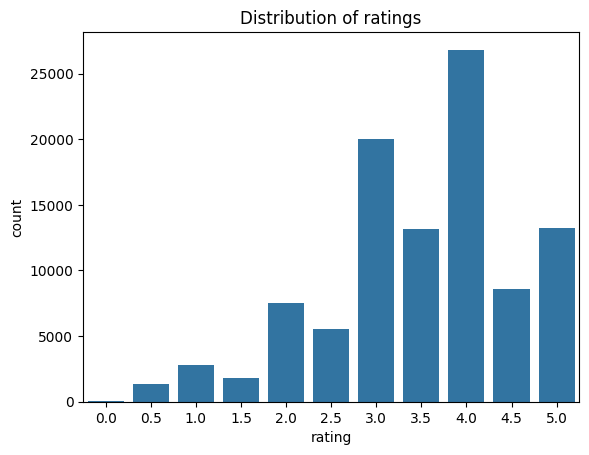

In [48]:
#Visualizing the ratings distribution
sns.countplot(x='rating',data=df)
plt.title("Distribution of ratings")
plt.show()

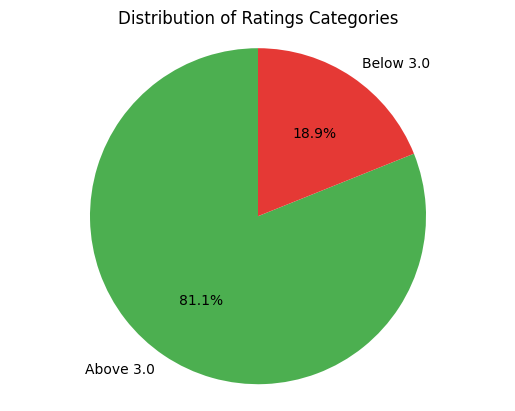

In [49]:
rating_category = df['rating'].apply(lambda x: 'Above 3.0' if x >= 3.0 else 'Below 3.0')

# Count the occurrences of each category
category_counts = rating_category.value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#E53935'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.title('Distribution of Ratings Categories')
plt.show()

Observation:
1. Maximum rating given to movies are 4.0 followed by 3.0.
2. Minimum rating given to movies are 0.5 followed by 1.5.
3. More than 80% of ratings are above 3.0
4. 81% movies are rated above average and 19% movies are rated below average.


* Top 5 movies with maximum ratings

<Figure size 1000x600 with 0 Axes>

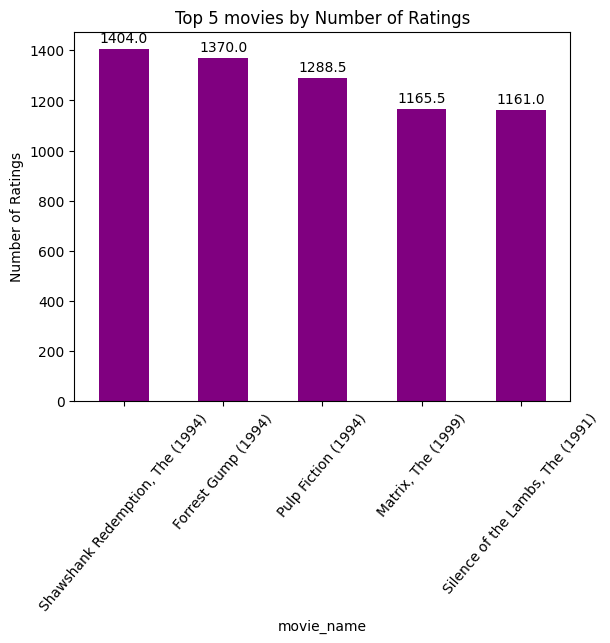

In [16]:
#getting the top 10 movies with maximum ratings

# Fill NaN values with zero
df['rating'].fillna(0, inplace=True)
df1=df.groupby(['title'])[['rating']].sum()

#  top 10 movies with the highest ratings
top_5_movies = df1.nlargest(5, 'rating')
plt.figure(figsize=(10, 6))
ax = top_5_movies.plot(kind='bar', legend=False, color='purple')
# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Top 5 movies by Number of Ratings')
plt.xlabel('movie_name')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=50)
plt.show()

Observation:
*  Shawshank Redemption got more number of ratings, a total of 1404 ratings, followed by forrest grump.


* Top 5 movies which got more ratings by users

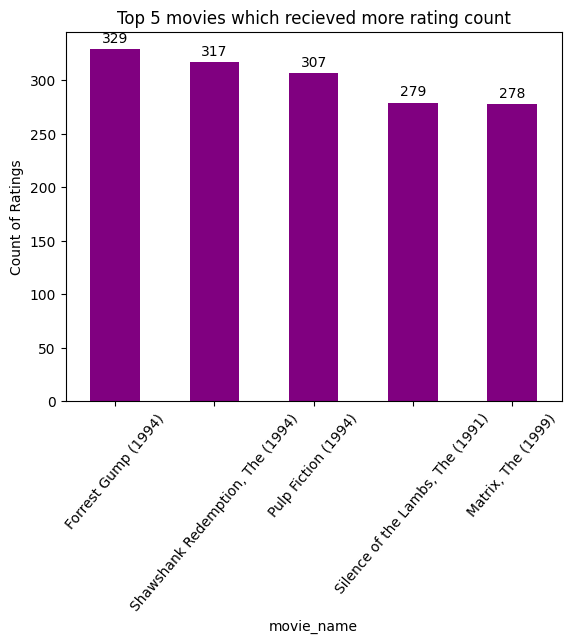

In [17]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(5,'rating')
ax = rating_count_20.plot(kind='bar', legend=False, color='purple')
# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Top 5 movies which recieved more rating count')
plt.xlabel('movie_name')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=50)
plt.show()

* Number of unique genres in the dataset

In [18]:
# Split the 'genres' column into separate genres
genres_split = df['genres'].str.split('|', expand=True)

# Reshape the DataFrame using stack, reset the index, and rename the columns
genres_count = genres_split.stack().reset_index(level=1, drop=True).rename('genre').reset_index()

# Count the occurrences of each genre
genre_counts = genres_count['genre'].value_counts()

pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values}).T.style.background_gradient(cmap='YlGn')



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Genre,Drama,Comedy,Action,Thriller,Adventure,Romance,Sci-Fi,Crime,Fantasy,Children,Mystery,Horror,Animation,War,IMAX,Musical,Western,Documentary,Film-Noir,(no genres listed)
Count,41940,39056,30635,26457,24162,18129,17243,16684,11835,9208,7674,7292,6989,4860,4145,4139,1930,1221,872,47


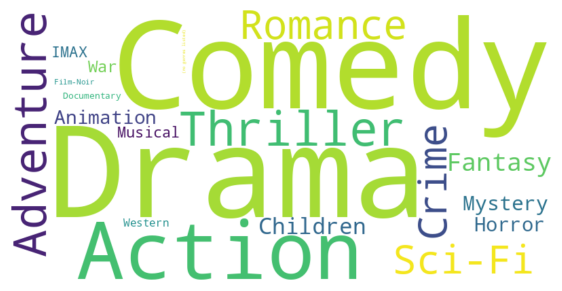

In [19]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Observation:
1. A total of 20 unique genre are present.
2. Most movies belong to "Drama" genre followed by "Action" and "Comedy".
3. A total of 47 movies have no genre.

<Figure size 1000x600 with 0 Axes>

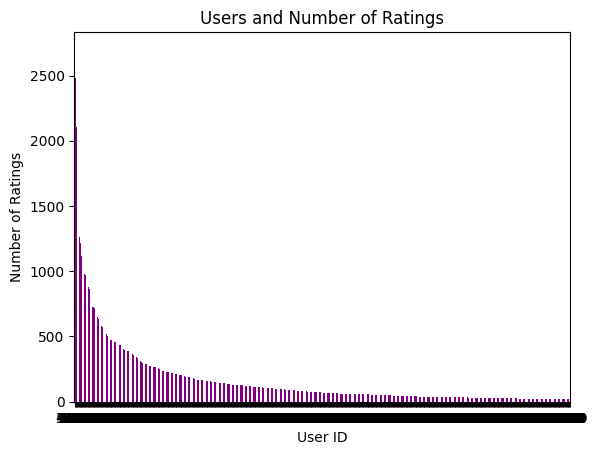

In [53]:
user_rating = df.groupby('userId').agg({'rating':'count'}).sort_values(by='rating',ascending=False)

#visualization
plt.figure(figsize=(10, 6))
user_rating.plot(kind='bar', legend=False, color='purple')
plt.title('Users and Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.show()

* Number of ratings over time distribution

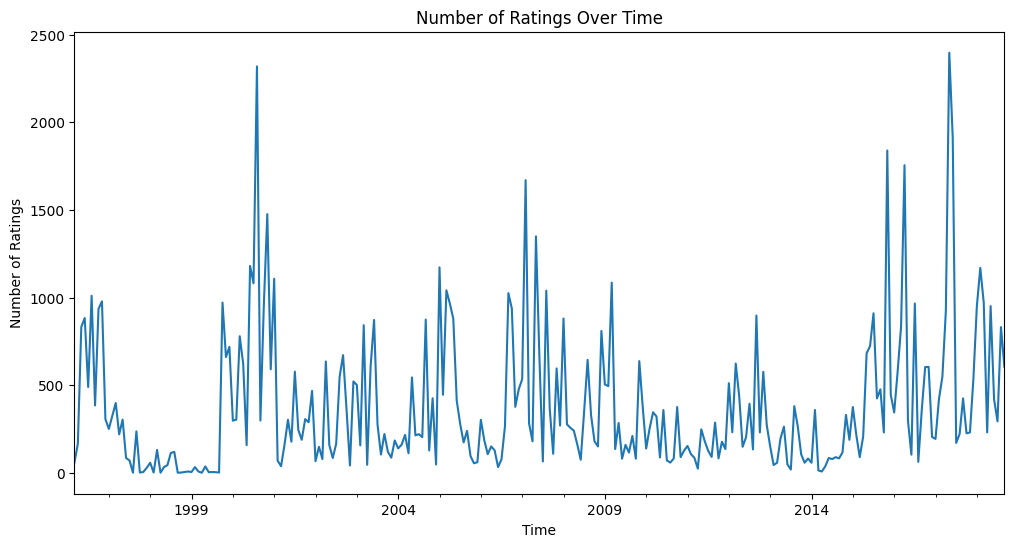

In [21]:
from datetime import datetime

#converting time to more readable format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Plot the number of ratings over time
plt.figure(figsize=(12, 6))
df.set_index('timestamp')['rating'].resample('M').count().plot()
plt.title('Number of Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()

##CONTENT BASED FILTERING
Content-based filtering for a movie recommendation system involves recommending items similar to those the user has liked in the past, based on the content or features of the items. In the context of movies, this can include features like genres, actors, directors, or any other relevant information.
1. `Preprocess the data :` Clean and preprocess the data, handling missing values, and ensuring consistency in the format of features.
2.` Feature Extraction :`Convert the relevant features into a format suitable for analysis. This could involve using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) for text data or one-hot encoding for categorical variables.
3. `Build a User Profile:`Create a profile for each user based on their interactions with items. This profile can be a representation of their preferences using the features you've identified.
4. `Calculate Item Similarity:`Use a similarity metric (e.g., cosine similarity, Jaccard similarity) to calculate the similarity between items based on their features.
5. `Generate Recommendations:`
For a given user, identify items that are similar to the ones they have liked or interacted with. The items with the highest similarity scores are recommended.
6. `Evaluate and Iterate:`Evaluate the performance of your content-based filtering model using appropriate metrics (e.g., precision, recall, F1 score). Iterate on the model and features to improve its accuracy.

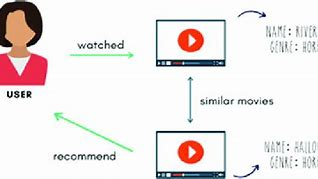

In [22]:
# Create a TF-IDF Vectorizer
movie_tfidf = TfidfVectorizer(stop_words='english')
movie_matrix = movie_tfidf.fit_transform(movie_df['genres'])

# Calculate cosine similarity
movie_similarity = linear_kernel(movie_matrix, movie_matrix)
movie_similarity.shape

(9742, 9742)

In [23]:
# considering movie_df,index as data and index as movie title
indices=pd.Series(movie_df.index,index=movie_df['title'])

#taking movie title
titles=movie_df['title']

# Function to get movie recommendations based on content similarity
def get_recommendations(title,cosine_sim=movie_similarity):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx])) #getting similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) #sorting similarity scores in descending order
    sim_scores = sim_scores[1:10] #Get the top 10 similar movies (excluding itself)
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [24]:
#getting recommendations
get_recommendations('Toy Story (1995)')

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object

In [25]:
get_recommendations('Flint (2017)')

25                      Othello (1995)
30              Dangerous Minds (1995)
36     Cry, the Beloved Country (1995)
39                  Restoration (1995)
50                      Georgia (1995)
51        Home for the Holidays (1995)
55           Mr. Holland's Opus (1995)
105    Boys of St. Vincent, The (1992)
120     Basketball Diaries, The (1995)
Name: title, dtype: object

Disadvantage:
1. Limited Diversity: Content-based filtering tends to recommend items similar to those the user has already interacted with. This may lead to a lack of diversity in recommendations, as the system may not introduce users to entirely new and different content.

2. Cold Start Problem: Content-based filtering can struggle with the "cold start" problem, where it's challenging to provide accurate recommendations for new users who have not yet provided enough interaction data. Similarly, it may face difficulties recommending new items that have limited historical data.

3. Dependency on Feature Representation: The effectiveness of content-based filtering heavily depends on the quality of the features used to represent items. If the features do not capture the essence of user preferences, the recommendations may not be accurate.

##COLLABORATIVE FILTERING
Collaborative filtering s a popular technique used in recommendation systems to make predictions about a user's interests by collecting preferences from many users (collaborating). The underlying assumption is that if a user A has similar preferences to user B on certain items, and if user A likes a new item that user B has already liked, then user A is likely to also like other items that user B has liked.

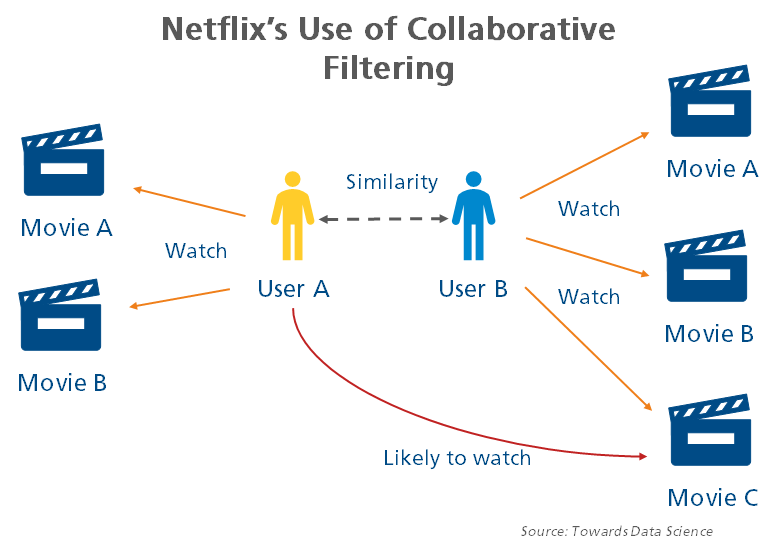

In [26]:
# Step 1: Create a Surprise Dataset
reader = Reader()
data = Dataset.load_from_df(rating_df[['userId', 'movieId', 'rating']], reader)

#Step 2: Build and Train an SVD Model --- SVD is a collaborative filtering algorithm.
svd = SVD()

# Step 3: Run 5-fold cross-validation and print results.
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8695  0.8695  0.8783  0.8802  0.8733  0.8741  0.0044  
MAE (testset)     0.6693  0.6686  0.6717  0.6783  0.6686  0.6713  0.0037  
Fit time          1.03    1.76    1.37    1.10    1.46    1.34    0.26    
Test time         0.10    0.32    0.11    0.20    0.25    0.20    0.08    


{'test_rmse': array([0.86949343, 0.86948529, 0.87829696, 0.88018527, 0.87326247]),
 'test_mae': array([0.66928424, 0.66860129, 0.67165214, 0.67832001, 0.66859812]),
 'fit_time': (1.0341904163360596,
  1.760279893875122,
  1.3694844245910645,
  1.0963811874389648,
  1.457643747329712),
 'test_time': (0.10433292388916016,
  0.3170289993286133,
  0.1107017993927002,
  0.203826904296875,
  0.24782466888427734)}

In [27]:
# Step 4: Build the full training set
trainset = data.build_full_trainset()
svd.fit(trainset)

In [28]:
rating_df[rating_df['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [29]:
# Predict the rating for user 1 on item 302
prediction =svd.predict(1, 302, 3)

# Print the predicted rating
print("Predicted Rating:", prediction.est)

Predicted Rating: 4.553179337409693


To predict ratings for all items that a user has not rated and recommend the top-rated items, you can follow these general steps:

1. `Get the List of Unrated Items for a User:`
Identify all items that a specific user has not rated. This typically involves creating a list of items that exist in your dataset but have not been rated by the user of interest.
2. `Use the Trained Model to Predict Ratings:`
 For each unrated item, use the trained collaborative filtering model to predict the rating that the user might give to that item. The predict method of the model can be used for this purpose.
3. `Sort Predicted Ratings:`After obtaining predicted ratings for unrated items, sort the items based on these predicted ratings in descending order. This will give you a ranked list of items.
4. `Recommend Top-Rated Items:`Select the top N items from the sorted list to recommend to the user. N can be a predefined number, and it represents the number of items you want to recommend.

In [30]:
# Function to Get the List of Unrated Items for a User:
def get_unrated_items(user_id, ratings_df=rating_df):
    # Get all unique movieIds in the dataset
    all_movie_ids = set(ratings_df['movieId'].unique())

    # Get movieIds rated by the user
    rated_movie_ids = set(ratings_df[ratings_df['userId'] == user_id]['movieId'])

    # Calculate unrated items by finding the set difference
    unrated_items = all_movie_ids - rated_movie_ids

    return list(unrated_items)


# Function to Recommend Top-Rated Items:
def recommend_top_items(user_id, model, unrated_items, top_n=5):
    recommendations = []

    for item_id in unrated_items:
        # Predict the rating for the unrated item
        predicted_rating = model.predict(user_id, item_id).est

        # Append the item and its predicted rating to the recommendations list
        recommendations.append((item_id, predicted_rating))

    # Sort the recommendations based on predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Select the top N items as recommendations
    top_recommendations = recommendations[:top_n]

    return top_recommendations

In [31]:
# Example: Recommend top 5 items for user 10
user_id = 10
unrated_items_for_user = get_unrated_items(user_id)  # You need to implement a function to get unrated items
top_recommendations = recommend_top_items(user_id = user_id, model=svd, unrated_items=unrated_items_for_user, top_n=5)

print("Top 5 Recommendations for User 10:")
for item_id, predicted_rating in top_recommendations:
    print(f"Item {item_id}: Predicted Rating = {predicted_rating}")


print("!"*60)
print("Recommended top 5 movies for user-10 are :")
for item_id, predicted_rating in top_recommendations:
  title = movie_df[movie_df['movieId'] == item_id]['title'].iloc[0]
  print(title)

Top 5 Recommendations for User 10:
Item 3275: Predicted Rating = 4.555199336283567
Item 1223: Predicted Rating = 4.349774801243508
Item 475: Predicted Rating = 4.314499781101603
Item 1197: Predicted Rating = 4.215525008848546
Item 260: Predicted Rating = 4.215018293976163
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Recommended top 5 movies for user-10 are :
Boondock Saints, The (2000)
Grand Day Out with Wallace and Gromit, A (1989)
In the Name of the Father (1993)
Princess Bride, The (1987)
Star Wars: Episode IV - A New Hope (1977)


Here's a high-level explanation how collaborative filtering works :
1. The model learns latent factors that represent the preferences of users and characteristics of items.
2. Predictions are made based on these learned factors.
4. ***`Recommendations are generated by suggesting items with the highest predicted ratings.`***

##HYBRID MODEL :
A hybrid recommendation system combines multiple recommendation approaches, such as collaborative filtering and content-based filtering, to provide more accurate and diverse recommendations.

In [33]:
# Step 3: Hybrid recommendation function
def hybrid_recommendation(user_id, movie_title, svd_model, cosine_sim, movies_df, ratings_df):
    # Get the movieId for the provided movie_title
    movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].iloc[0]

    # Predict the rating for the user and movie using collaborative filtering (SVD)
    predicted_rating = svd_model.predict(user_id, movie_id).est

    # Get the indices of movies similar to the provided movie based on genres
    movie_indices = movies_df.index[movies_df['title'] == movie_title].tolist()[0]
    similar_movies = list(enumerate(cosine_sim[movie_indices]))

    # Sort the similar movies by similarity score
    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)

    # Extract the movie indices and scores
    movie_indices, scores = zip(*similar_movies)

    # Get the top N similar movies
    top_similar_movies = list(movie_indices)[:5]

    # Filter out movies the user has already rated
    user_rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()
    top_similar_unrated_movies = [movie_id for movie_id in top_similar_movies if movie_id not in user_rated_movies]

    return {
        'predicted_rating': predicted_rating,
        'top_similar_unrated_movies': top_similar_unrated_movies
    }

# Example: Get recommendations for user 10 and movie "Toy Story (1995)"
user_id = 10
movie_title = "Toy Story (1995)"
recommendations = hybrid_recommendation(user_id = user_id,
                                        movie_title = movie_title,
                                        svd_model =svd,
                                        cosine_sim = movie_similarity,
                                        movies_df =movie_df,
                                        ratings_df =rating_df)

recommendations

{'predicted_rating': 3.2146268447559585,
 'top_similar_unrated_movies': [0, 1706, 2355, 2809, 3000]}

In [47]:
#getting recommended movie names
for item_id in recommendations.get('top_similar_unrated_movies'):
    if item_id not in movie_df['movieId'].values:
        continue
    else:
        title = movie_df.loc[movie_df['movieId'] == item_id, 'title'].iloc[0]
        print(title)

Bug's Life, A (1998)
Princess Mononoke (Mononoke-hime) (1997)
